In [21]:
%matplotlib inline
import numpy as np
import quantum as q
import matplotlib.pyplot as plt
from math import sqrt
from tqdm import tqdm, trange

plt.style.use('seaborn')

In [6]:
runs = 10**6
d = 2

sample states from haar measure, count the number of negativity increased events

In [12]:
neg_init = []
neg_final = []
count = 0

for i in trange(runs):
    psi = np.zeros(d**2, dtype = complex)
    psi[0] = 1
    psi = psi / np.linalg.norm(psi)
    
    psi = q.randu(d**2)@psi
    rho = np.outer(psi, psi.conj())
    
    U = q.randu(d**2)
    
    rho_post = (
        U.conj().transpose()
        @np.diag((U@rho@U.conj().transpose()).diagonal())
        @U
    )
    
    neg_rho = q.negativity(rho, [d, d], [0, 1])
    neg_rho_post = q.negativity(rho_post, [d, d], [0, 1])
    
    neg_init.append(neg_rho)
    neg_final.append(neg_rho_post)
    
    if (neg_rho_post > neg_rho):
        count += 1
        
print(f'p {count/runs}')

100%|██████████| 1000000/1000000 [07:25<00:00, 2246.29it/s]

p 0.016133


plot initial negativity against final negativity, along with proposed upper bound

(0, 0.5)

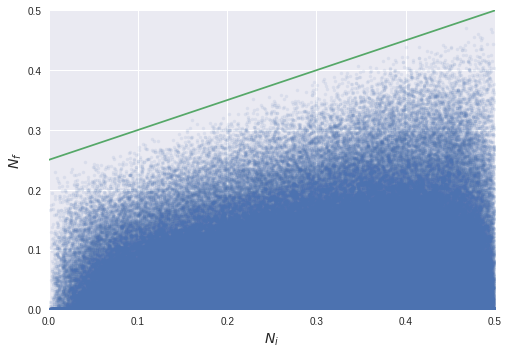

In [22]:
plt.plot(neg_init, neg_final, '.', alpha = 0.1)
plt.plot(np.linspace(0, 0.5, runs), np.linspace(0.25, 0.5, runs), '-')
plt.xlabel('$N_i$', fontsize = 14)
plt.ylabel('$N_f$', fontsize = 14)
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)